In [1]:
# data split notes
# https://www.coursera.org/learn/cse572/discussions/weeks/7/threads/FHX94UkbTA-1_eFJG-wPXw?sort=createdAtDesc
# https://www.coursera.org/learn/cse572/discussions/weeks/7/threads/mrCBtiFrTaiwgbYhaz2orQ

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

In [6]:
new_feature_space = pd.read_csv('new_feature_space.csv')
new_feature_space.tail()

,0,1,2,3,4,eating
115,-1.422306,-5.208647,-67.556772,-15.107284,-5.511506,False
116,-10.993742,16.582681,-10.961767,16.044141,-45.217387,True
117,69.792213,22.460840,19.915777,-6.082213,37.951157,False
118,-58.173591,35.547185,18.917284,22.436761,-4.835705,True
119,105.686347,52.967244,-0.929815,-41.773161,14.905060,False


In [7]:
def print_precision_recall_F1score(precision,recall,F1score):
    for i, item in enumerate(('eating class ', 'non eating class ')):
        print(item + 'precision =', "%.2f" % precision[i])
        print(item + 'recall =', "%.2f" % recall[i])
        print(item + 'F1score =', "%.2f" % F1score[i])
    

# Phase 1
We take 60% of the **features** from each user and append it to the training set. And the remaining 40% goes to the testing set. This makes sure that the data is user dependent so that we can perform user dependent analysis. 

## Division of Data (user dependent analysis)

In [13]:
user_dependent_feature_space = new_feature_space.T # transpose so that we can split by features
train, test = train_test_split(user_dependent_feature_space.iloc[:-1,:], test_size=0.4)
train = train.append(user_dependent_feature_space.iloc[-1,:])
test = test.append(user_dependent_feature_space.iloc[-1,:])
train = train.T
test = test.T
train.reset_index(inplace=True,drop=True)
test.reset_index(inplace=True,drop=True)
X = train.iloc[:,:-1] # data 
Y = train.iloc[:,-1] # class labels
train.tail()

,1,0,3,eating
115,-5.20865,-1.42231,-15.1073,False
116,16.5827,-10.9937,16.0441,True
117,22.4608,69.7922,-6.08221,False
118,35.5472,-58.1736,22.4368,True
119,52.9672,105.686,-41.7732,False


## 3 machine learning algorithms

### Decision Tree

In [14]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

ValueError: Unknown label type: 'unknown'

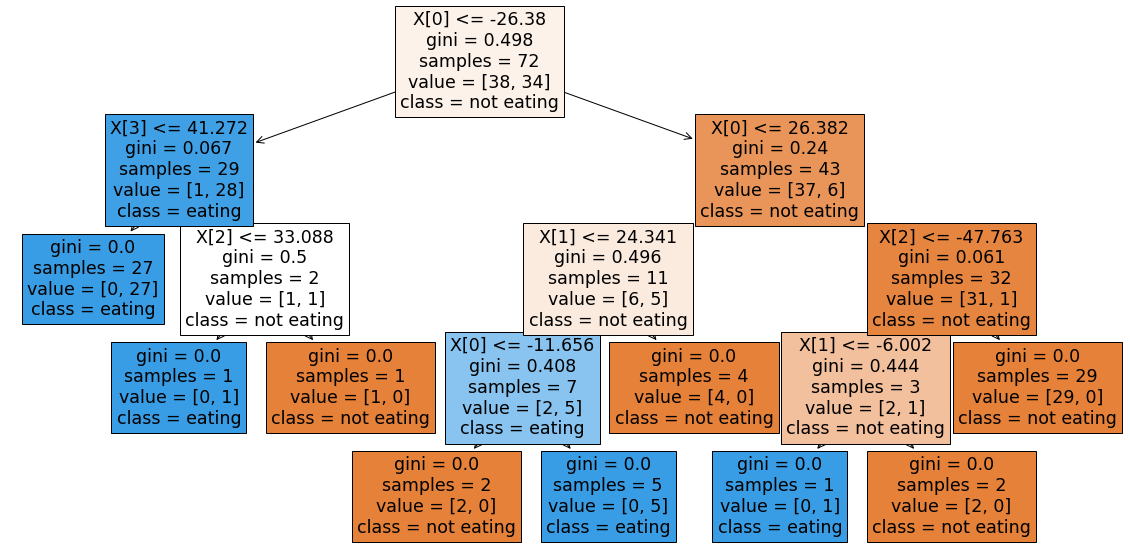

In [109]:
fig, ax = plt.subplots(figsize=(20, 10))
decision_tree_plot = tree.plot_tree(clf.fit(X, Y), ax=ax, filled=True, class_names=['not eating','eating'], )

In [134]:
# precision, recall, F1 score
y_pred = clf.predict(test.iloc[:,:-1])
y_true = test.iloc[:,-1]
precision, recall, F1score, support = precision_recall_fscore_support(y_true, y_pred)
print_precision_recall_F1score(precision,recall,F1score)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

### Support Vector Machine (SVM)

In [135]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',gamma='scale') # or gamma='scale'
clf.fit(X, Y)
# precision, recall, F1 score
y_pred = clf.predict(test.iloc[:,:-1])
y_true = test.iloc[:,-1]
precision, recall, F1score, support = precision_recall_fscore_support(y_true, y_pred)
print_precision_recall_F1score(precision,recall,F1score)

ValueError: Unknown label type: 'unknown'

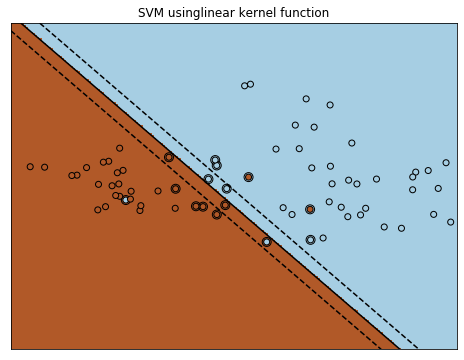

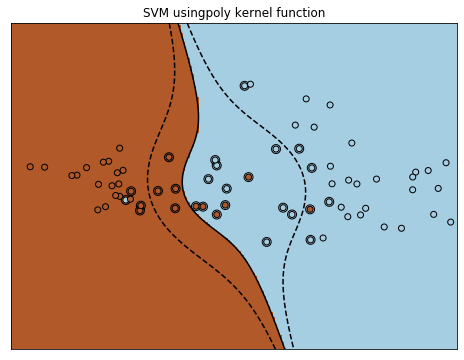

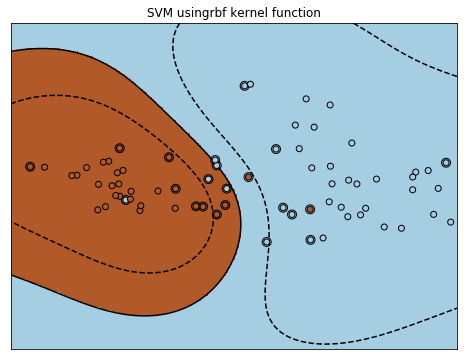

In [17]:
# code from documentation at: https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py
# plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap=plt.cm.Paired)
color_map_SVM = plt.cm.Paired
#color_map_SVM = 'PiYG'
fignum = 1
for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma='scale')
    clf.fit(X.iloc[:,0:2], Y)

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(8, 6))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, zorder=10, cmap=color_map_SVM,
                edgecolors='k')

    plt.axis('tight')
    x_min = -200
    x_max = 200
    y_min = -200
    y_max = 200

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(8, 6))
    plt.pcolormesh(XX, YY, Z > 0, cmap=color_map_SVM)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    plt.title("SVM using" + kernel + " kernel function")
    fignum = fignum + 1
plt.show()

### Neural Networks

In [139]:
# Multi layer perceptron network --- neural network
# ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)
# ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs',activation='relu', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X, Y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [140]:
y_pred = clf.predict(test.iloc[:,:-1])
y_true = test.iloc[:,-1]
precision, recall, F1score, support = precision_recall_fscore_support(y_true, y_pred)
print_precision_recall_F1score(precision,recall,F1score)

eating class precision = 0.95
eating class recall = 0.80
eating class F1score = 0.87
non eating class precision = 0.81
non eating class recall = 0.96
non eating class F1score = 0.88


# Phase 2
So for this phase, the data is split from all user data. So we take all user data and perform the 60-40 split. 

## Division of Data (user independent analysis)

In [43]:
# to be able to perform user independent analysis, we need to shuffle each column. That was, each row is a mix of data from different users
new_feature_space

,0,1,2,3,4,eating
0,162.920566,-12.372565,-34.644204,50.015042,-32.254139,True
1,194.264170,-27.901031,56.333862,-39.379301,-33.609012,False
2,-106.211067,-27.056992,-48.182003,22.093784,-51.514085,True
3,-182.529265,-21.228938,17.985238,-40.431404,-27.784372,False
4,-83.372509,2.291399,18.295970,5.474396,16.765091,True
...,...,...,...,...,...,...
115,-29.943756,-5.208647,-67.556772,-15.107284,-5.511506,False
116,-92.096703,16.582681,-10.961767,16.044141,-45.217387,True
117,28.696293,22.460840,19.915777,-6.082213,37.951157,False
118,68.696200,35.547185,18.917284,22.436761,-4.835705,True


In [37]:
# first get true classes together, then mix columns. Do the same for false classes, then merge them all back together
# this way, when columns  get shuffled, a feature value for a true class will get put on the same row as other features that lead to true, just from different users
# mask = new_feature_space['eating'] == True
# df_eating = new_feature_space[mask]
# df_non_eating = new_feature_space[~mask]
# #print(df_eating.head())

# # shuffle each one
# for i in range(5):
#     df_eating.iloc[:,i] = np.random.permutation(df_eating.iloc[:,i])
#     df_non_eating.iloc[:,i] = np.random.permutation(df_non_eating.iloc[:,i])
#     #print("\n\n")
#     #print(df_eating.head())
    
# new_feature_space_col_shuffled = pd.concat([df_eating, df_non_eating])
# new_feature_space_col_shuffled

## older code
train, test = train_test_split(new_feature_space, test_size=0.4)
train.reset_index(inplace=True,drop=True)
test.reset_index(inplace=True,drop=True)
X = train.iloc[:,:-1] # data 
Y = train.iloc[:,-1] # class labels
train.head()

## make sure you get 60% eating=True and 60% eating=False. 
## That way you get the same amount of eating/non eating in the training and testing sets
mask = new_feature_space['eating'] == True
df_eating = new_feature_space[mask]
df_non_eating = new_feature_space[~mask]
train_eating, test_eating = train_test_split(df_eating, test_size=0.4)
train_non_eating, test_non_eating = train_test_split(df_non_eating, test_size=0.4)
train = train_eating.append(train_non_eating)
test = test_eating.append(test_non_eating)
train

,0,1,2,3,4,eating
36,-102.352778,46.649330,-44.455231,2.269915,23.488278,True
44,-78.430547,2.669723,-69.485972,-14.798472,3.943419,True
68,-106.211067,34.614142,-15.180563,1.221794,-6.725300,True
24,-48.353123,-13.170633,26.927985,73.039303,-25.803610,True
96,-126.809613,4.523016,22.036201,30.907253,-7.588412,True
70,-59.306120,-11.893202,-51.567946,-67.341717,-15.174645,True
14,-67.999403,-5.839170,-4.050807,-17.653448,-8.150242,True
6,-109.155718,0.564168,5.283319,-23.584727,20.173939,True
4,-121.323946,2.291399,18.295970,5.474396,16.765091,True
74,-116.975564,29.485279,9.674060,-4.303491,5.793198,True


In [92]:
train, test = train_test_split(new_feature_space_col_shuffled, test_size=0.4)
train.reset_index(inplace=True,drop=True)
test.reset_index(inplace=True,drop=True)
X = train.iloc[:,:-1] # data 
Y = train.iloc[:,-1] # class labels
train

,0,1,2,3,4,eating
0,19.107749,-33.512032,46.292755,-32.635683,-22.125031,True
1,87.982534,-2.599665,-26.784914,-11.316060,13.031420,True
2,-92.717541,123.125448,-14.415720,-14.820500,5.882836,True
3,-99.321266,-5.839170,57.814584,-2.327514,-36.778290,False
4,160.167256,-34.537248,31.992142,24.848806,88.598474,True
...,...,...,...,...,...,...
67,130.695978,-2.696321,17.230972,22.789524,-15.174645,False
68,-156.820430,24.524328,60.200597,16.044141,13.704758,True
69,53.575709,-28.342363,16.159981,12.229880,-11.053678,False
70,41.632878,2.669723,-15.180563,-37.274389,-4.161615,True


## 3 machine learning algorithms

### Decision Tree

In [93]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

[Text(596.0454545454545, 513.4, 'X[4] <= 4.37\ngini = 0.494\nsamples = 72\nvalue = [32, 40]\nclass = eating'),
 Text(279.0, 453.0, 'X[3] <= -30.687\ngini = 0.49\nsamples = 42\nvalue = [24, 18]\nclass = not eating'),
 Text(101.45454545454545, 392.6, 'X[1] <= 10.49\ngini = 0.219\nsamples = 8\nvalue = [1, 7]\nclass = eating'),
 Text(50.72727272727273, 332.2, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = eating'),
 Text(152.1818181818182, 332.2, 'X[3] <= -38.687\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = eating'),
 Text(101.45454545454545, 271.8, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = eating'),
 Text(202.9090909090909, 271.8, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = not eating'),
 Text(456.54545454545456, 392.6, 'X[2] <= -28.052\ngini = 0.438\nsamples = 34\nvalue = [23, 11]\nclass = not eating'),
 Text(355.09090909090907, 332.2, 'X[3] <= 27.431\ngini = 0.463\nsamples = 11\nvalue = [4, 7]\nclass = eating'),
 Text(304.3636363636364, 271.8, 'X[2] <= -56.489\ng

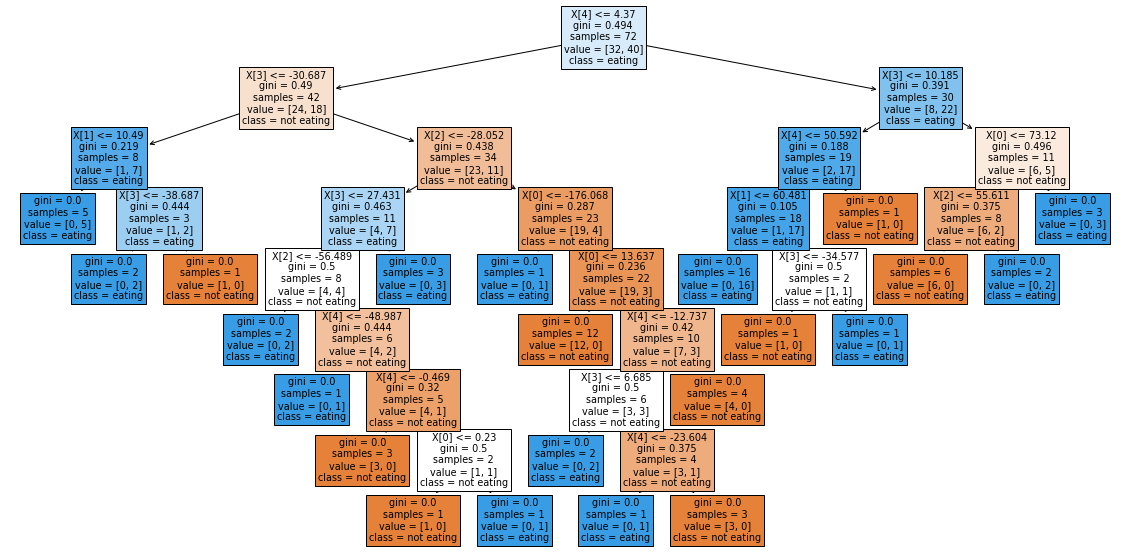

In [94]:
# import graphviz
# dot_data = tree.export_graphviz(clf, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph
fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(clf.fit(X, Y), ax=ax, filled=True, class_names=['not eating','eating'])

In [95]:
# precision, recall, F1 score
y_pred = clf.predict(test.iloc[:,:-1])
y_true = test.iloc[:,-1]
precision, recall, F1score, support = precision_recall_fscore_support(y_true, y_pred)
print_precision_recall_F1score(precision,recall,F1score)

eating class precision = 0.55
eating class recall = 0.39
eating class F1score = 0.46
non eating class precision = 0.39
non eating class recall = 0.55
non eating class F1score = 0.46


### Support Vector Machine (SVM)

In [96]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',gamma='scale') # or gamma='scale'
clf.fit(X, Y)
# precision, recall, F1 score
y_pred = clf.predict(test.iloc[:,:-1])
y_true = test.iloc[:,-1]
precision, recall, F1score, support = precision_recall_fscore_support(y_true, y_pred)
print_precision_recall_F1score(precision,recall,F1score)

eating class precision = 0.50
eating class recall = 0.21
eating class F1score = 0.30
non eating class precision = 0.39
non eating class recall = 0.70
non eating class F1score = 0.50


/home/spencerwillett15/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: No contour levels were found within the data range.


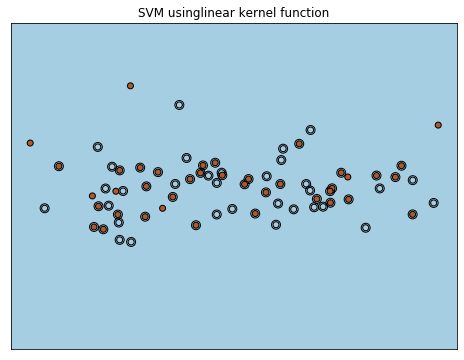

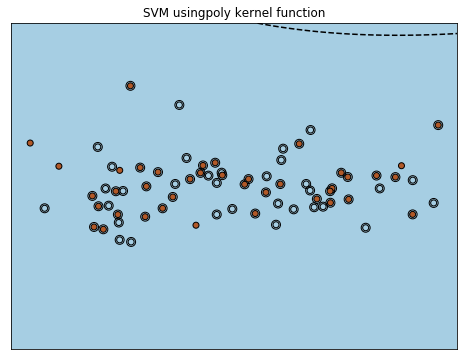

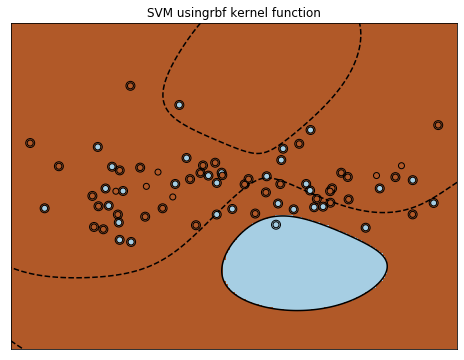

In [97]:
# code from documentation at: https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py
# plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap=plt.cm.Paired)
color_map_SVM = plt.cm.Paired
#color_map_SVM = 'PiYG'
fignum = 1
for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma='scale')
    clf.fit(X.iloc[:,0:2], Y)

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(8, 6))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, zorder=10, cmap=color_map_SVM,
                edgecolors='k')

    plt.axis('tight')
    x_min = -200
    x_max = 200
    y_min = -200
    y_max = 200

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(8, 6))
    plt.pcolormesh(XX, YY, Z > 0, cmap=color_map_SVM)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    plt.title("SVM using" + kernel + " kernel function")
    fignum = fignum + 1
plt.show()

### Neural Networks

In [98]:
# Multi layer perceptron network --- neural network
# ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)
# ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs',activation='relu', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X, Y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [99]:
y_pred = clf.predict(test.iloc[:,:-1])
y_true = test.iloc[:,-1]
precision, recall, F1score, support = precision_recall_fscore_support(y_true, y_pred)
print_precision_recall_F1score(precision,recall,F1score)

eating class precision = 0.60
eating class recall = 0.75
eating class F1score = 0.67
non eating class precision = 0.46
non eating class recall = 0.30
non eating class F1score = 0.36
